In [121]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime

In [126]:
transactions = pd.read_csv('transactions.csv')
customers = pd.read_csv('customers.csv')
council = pd.read_csv('Cleaned_merged_14-16_credit_card_fraud_data.csv')

# Convert balances to USD at historical rate: http://www.tradingeconomics.com/czech-republic/currency
# using 30 CZK = 1 USD

transactions['balance'] = transactions['balance'] / 30

In [506]:
transactions.head

<bound method DataFrame.head of          Unnamed: 0  trans_id  account_id        date type  operation  \
0                 0    695247        2378  1993-01-01    1        2.0   
1                 1    695250        2378  1993-01-22    1        2.0   
2                 2    695266        2378  1993-01-23    1        2.0   
3                 3    695262        2378  1993-01-24    1        2.0   
4                 4    695265        2378  1993-01-26    1        2.0   
5                 5    695560        2378  1993-01-31    0        3.0   
6                 6   3608592        2378  1993-01-31    1        NaN   
7                 7    695272        2378  1993-02-05    1        2.0   
8                 8    695340        2378  1993-02-07    0        0.0   
9                 9    695270        2378  1993-02-11    1        2.0   
10               10    695561        2378  1993-02-11    0        3.0   
11               11    695251        2378  1993-02-20    1        2.0   
12               12

In [4]:
customers.head

<bound method DataFrame.head of       Unnamed: 0  account_id  district_id  frequency        date  \
0              0         576           55          0  1993-01-01   
1              1         704           55          0  1993-01-01   
2              2         192           55          0  1993-01-08   
3              3       10364           55          0  1993-01-17   
4              4         497           55          0  1993-04-15   
5              5       10105           55          0  1993-04-28   
6              6        4225           55          0  1993-05-18   
7              7        1851           55          0  1993-05-23   
8              8        2029           55          0  1993-05-29   
9              9        5215           55          0  1993-07-01   
10            10        1689           55          0  1993-09-07   
11            11        1440           55          0  1993-09-22   
12            12         243           55          2  1993-11-06   
13            13

In [127]:
council.head

<bound method DataFrame.head of       Unnamed: 0                   Service Area  \
0              0                      Assurance   
1              1     Children's Family Services   
2              2     Children's Family Services   
3              3     Children's Family Services   
4              4     Children's Family Services   
5              5     Children's Family Services   
6              6     Children's Family Services   
7              7     Children's Family Services   
8              8     Children's Family Services   
9              9     Children's Family Services   
10            10     Children's Family Services   
11            11     Children's Family Services   
12            12     Children's Family Services   
13            13                      Assurance   
14            14         Children's Service DSG   
15            15     Children's Family Services   
16            16     Children's Family Services   
17            17         Customer Support Group   

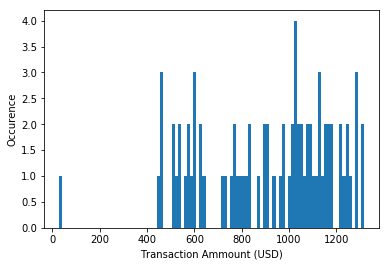

In [81]:
missing = transactions[transactions['k_symbol'].isnull()]
sample = missing[missing['account_id'] == customers['account_id'][0]]

plt.hist(sample['balance'], 100)
plt.ylabel('Occurence')
plt.xlabel('Transaction Ammount (USD)')
plt.show()

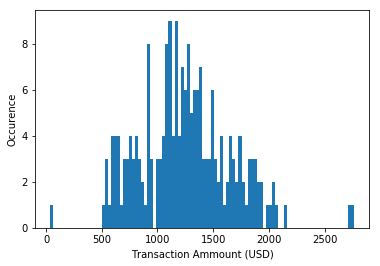

In [82]:
missing = transactions[transactions['k_symbol'].isnull()]
sample = missing[missing['account_id'] == customers['account_id'][1]]

plt.hist(sample['balance'], 100)
plt.ylabel('Occurence')
plt.xlabel('Transaction Ammount (USD)')
plt.show()

In [80]:
acc_balance = list()
acc_date = list()
for acc in np.unique(transactions['account_id']):
    x = transactions.loc[transactions['account_id'] == acc,:]
    acc_date.append(x['date'])
    acc_balance.append(x['balance'])
    
acc_deltas = list()
delta_time = list()
for acc_idx in xrange(0, len(acc_balance)):
    balance = np.asarray(acc_balance[acc_idx])
    acc_deltas.append(balance[1:] - balance[0:-1])
    delta_time.append(np.asarray(acc_date[acc_idx])[0:-1])

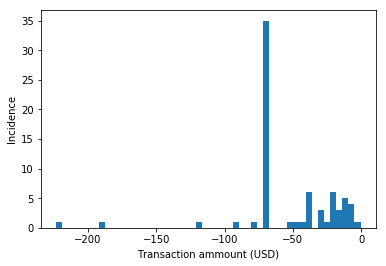

In [88]:
individual = 10
plt.hist(acc_deltas[individual][acc_deltas[individual] < 0], 50)
plt.ylabel('Incidence')
plt.xlabel('Transaction ammount (USD)')
plt.show()

In [118]:
expenses = list()
dates = list()
for individual in xrange(0, len(acc_deltas)):
    expenses.append(acc_deltas[individual][acc_deltas[individual] < 0])
    dates.append(delta_time[individual][acc_deltas[individual] < 0])

In [111]:
all_expenses = np.concatenate(expenses)

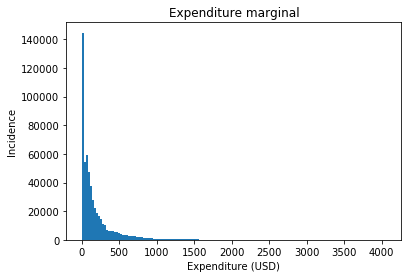

In [114]:
plt.hist(-all_expenses, 150)
plt.ylabel('Incidence')
plt.xlabel('Expenditure (USD)')
plt.title('Expenditure marginal')
plt.show()

In [313]:
areas = np.unique(council.loc[:, 'Service Area'])
area_code = np.arange(0, len(areas))

cats = council.columns[2:-4]
cats_code = np.arange(0, len(cats))

creditors = np.unique(council.loc[:, 'Creditor'])
cred_code = np.arange(0, len(creditors))

encoded_area = list()
encoded_cred = list()
encoded_cats = list()
clean_totals = list()
for entry in xrange(0, len(council.loc[:, 'Service Area'])):
    amt = (float(str(council.loc[entry, 'Total']).replace(',','')) / 1.5) # Using 1.5 conversion rate to USD
    if amt > 0:
        clean_totals.append(amt)
        encoded_area.append(area_code[areas == council.loc[entry, 'Service Area']][0])
        encoded_cred.append(cred_code[creditors == council.loc[entry, 'Creditor']][0])
        encoded_cats.append(cats_code[cats == cats[council.loc[entry, cats] > 0][0]][0])

In [314]:
new_council = pd.DataFrame({
    'Area': encoded_area,
    'Categories': encoded_cats,
    'Creditor': encoded_cred,
    'Total': clean_totals
})

In [296]:
area_spending = list()
used_areas = list()
for ii in area_code:
    spent = new_council.loc[new_council.loc[:,'Area'] == ii, 'Total']
    if len(spent) > 10: # ditch areas that have not enough info
        used_areas.append(ii)
        area_spending.append(spent)

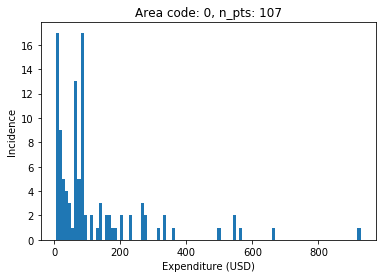

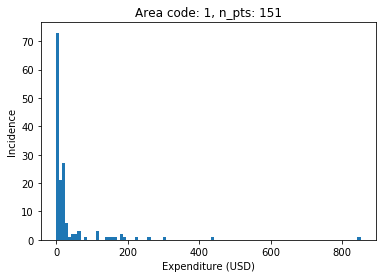

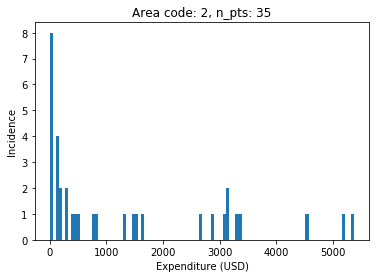

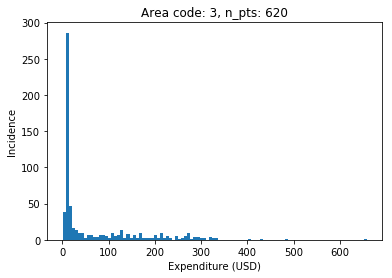

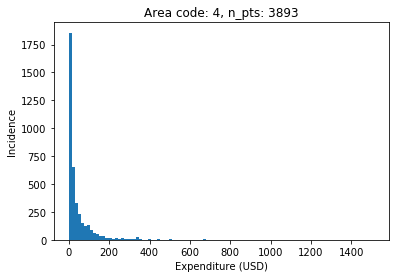

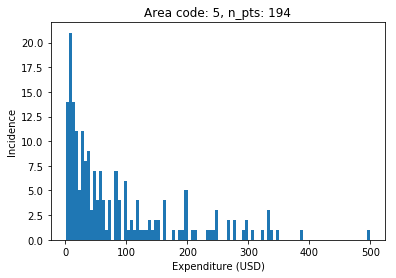

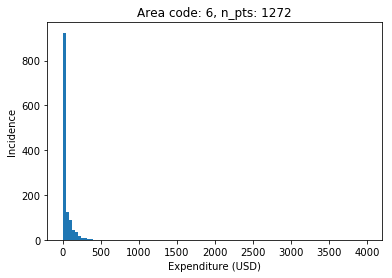

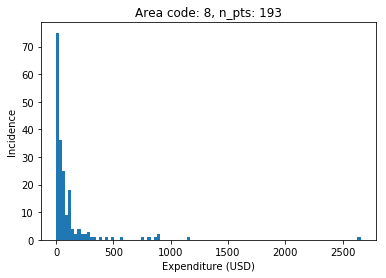

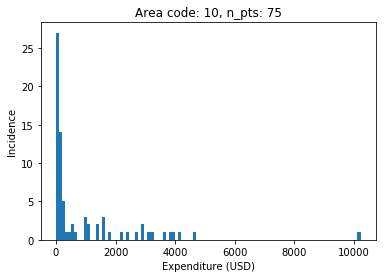

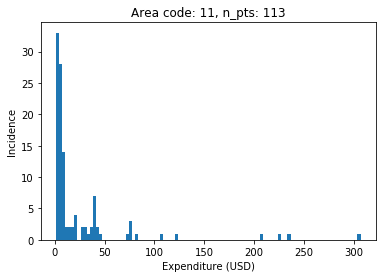

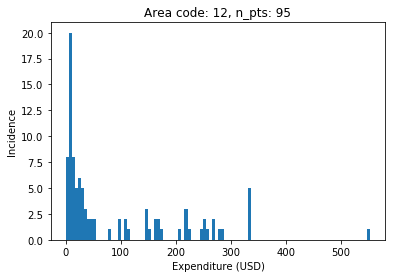

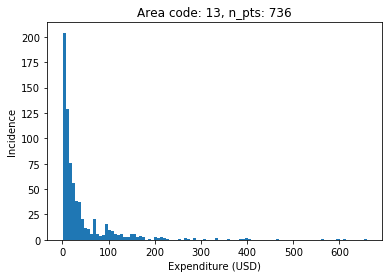

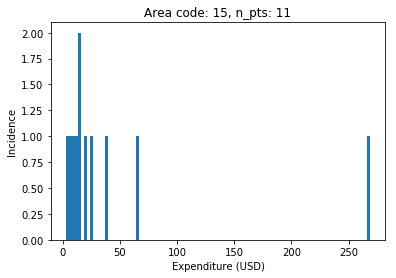

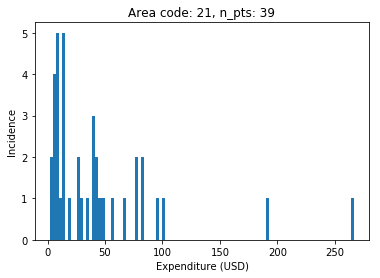

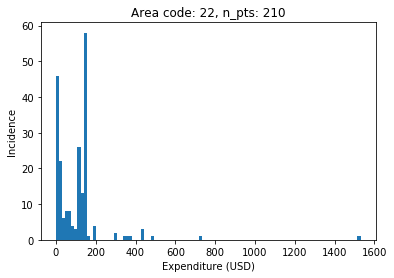

In [297]:
for ii in xrange(0, len(area_spending)):
    plt.hist(area_spending[ii], 100)
    plt.title('Area code: ' + str(used_areas[ii]) + ', n_pts: ' + str(len(area_spending[ii])))
    plt.ylabel('Incidence')
    plt.xlabel('Expenditure (USD)')
    plt.show()

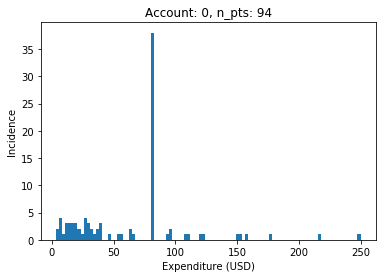

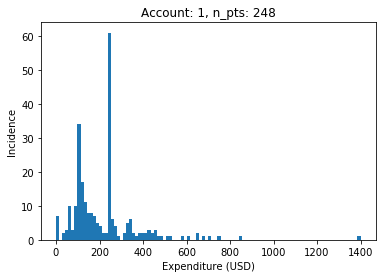

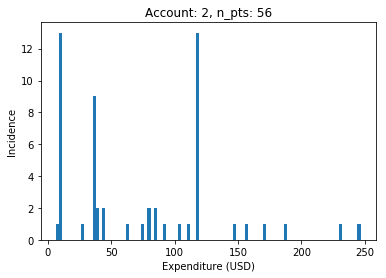

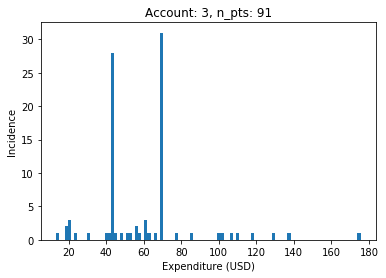

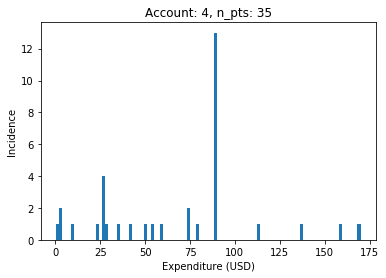

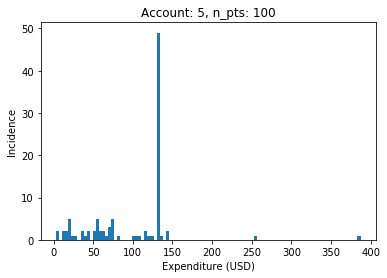

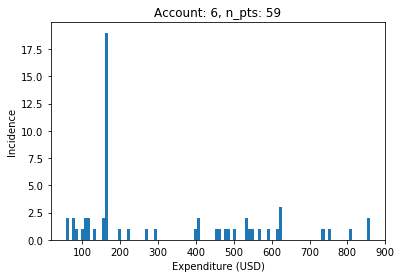

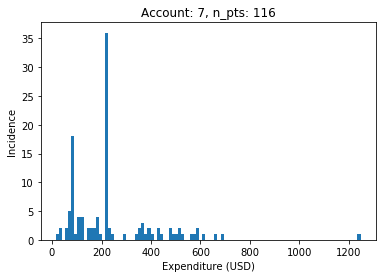

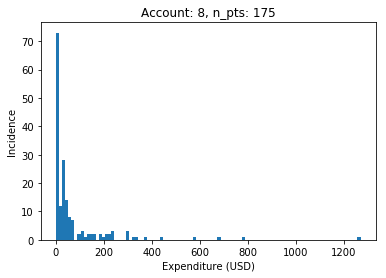

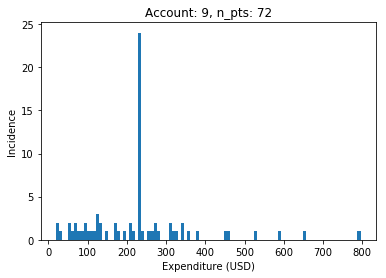

In [298]:
for ii in xrange(0, 10):
    plt.hist(-expenses[ii], 100)
    plt.title('Account: ' + str(ii) + ', n_pts: ' + str(len(expenses[ii])))
    plt.ylabel('Incidence')
    plt.xlabel('Expenditure (USD)')
    plt.show()

In [299]:
area_stats = list()
for ii in xrange(0, len(area_spending)):
    mean = np.mean(area_spending[ii])
    variance = np.var(area_spending[ii])
    skewness = stats.skew(area_spending[ii])
    kurtosis = stats.kurtosis(area_spending[ii])
    area_stats.append([mean, variance, skewness, kurtosis])
    
area_stats = np.array(area_stats)

In [300]:
acc_stats = list()
for ii in xrange(0, len(expenses)):
    mean = np.mean(-expenses[ii])
    variance = np.var(-expenses[ii])
    skewness = stats.skew(-expenses[ii])
    kurtosis = stats.kurtosis(-expenses[ii])
    acc_stats.append([mean, variance, skewness, kurtosis])
    
acc_stats = np.array(acc_stats)

In [301]:
# Matching
acc_best_proj = np.zeros([acc_stats.shape[0], 1])

for ii in xrange(0, acc_stats.shape[0]):
    
    score = np.zeros([area_stats.shape[0], 1])
    
    for jj in xrange(0, area_stats.shape[0]):
        score[jj] = np.linalg.norm(acc_stats[ii, :] - area_stats[jj, :])
    
    min_dist = np.min(score)
    acc_best_proj[ii] = np.where(score == min_dist)[0]
    

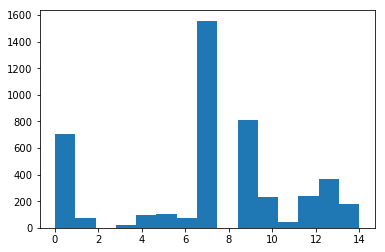

In [302]:
plt.hist(acc_best_proj, len(score)) # let's just visualize how many entries are in each 
plt.show()

At this point we need to assume some models and the obvious choice for a model is a mixture of Gaussians, i.e.

$$p(c|s) = \frac{p(s|c)p(c)}{p(s)}$$

where $p(c)$ is categorical and $p(s|c)$ is a mixture of Gaussians,

$$ p(c = k)= \pi_{k} $$

$$ p(s|c_{i}) = \mathcal{N}(s; \mu_{i}, \sigma_{i}^{2}) $$

$$ p(s) = \sum_{i=1} \pi_{i} \mathcal{N}(s; \mu_{i}, \sigma_{i}^{2}) $$

Because in our specific case everything is decoupled and observed (hence the clusters are already formed), we can go ahead and estimate each of the parameters directly without needing to resort to more complex models.

In [490]:
freq_cat = pd.pivot_table(new_council, values='Total', columns='Categories', index=['Area'], aggfunc='count').fillna(0.001)

# Get category probabilities
area_prob_cat = list()
for ii in xrange(0, freq_cat.shape[0]):
    if ii in used_areas:
        area_prob_cat.append(np.array(freq_cat.loc[ii, :]) / freq_cat.loc[ii,:].sum())
    
# Get category mean value
cat_mean = np.array(pd.pivot_table(new_council, values='Total', index='Categories', aggfunc=np.mean).fillna(0))
cat_var = np.array(pd.pivot_table(new_council, values='Total', index='Categories', aggfunc=np.var).fillna(0.0001)) # jiggling var

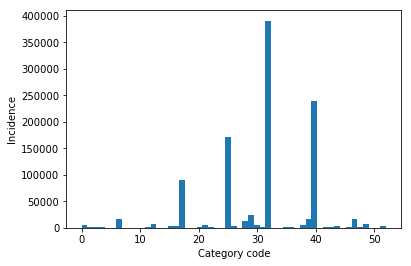

In [646]:
delta_meta_cred = list()
for ii in xrange(0, len(acc_deltas)):
    delta_meta_cred.append(list())
    for jj in xrange(0, len(acc_deltas[ii])):
        score = - 0.5 * (acc_deltas[ii][jj] - cat_mean) ** 2 / cat_var
        most_prob = np.max(score)
        delta_meta_cred[ii].append(np.where(score == most_prob)[0][0])
        
plt.hist(np.concatenate(delta_meta_cred), len(cat_mean))
plt.ylabel('Incidence')
plt.xlabel('Category code')
plt.show()

In [504]:
acc_trans_id = list()
for acc in np.unique(transactions['account_id']):
    x = transactions.loc[transactions['account_id'] == acc,:]
    acc_trans_id.append(x['trans_id'])
    
for acc_idx in xrange(0, len(acc_trans_id)):
    balance = np.asarray(acc_balance[acc_idx])
    acc_trans_id[ii] = acc_trans_id[ii][1:]

In [632]:
acc_trans_id = list()
acc_mean_inc = list()
acc_k_symbol = list()
acc_init_bal = list()
for acc in np.unique(transactions['account_id']):
    x = transactions.loc[transactions['account_id'] == acc,:]
    acc_trans_id.append(list(x['trans_id'])[1:])
    acc_mean_inc.append(float(str(x['mean_income'].iloc[0]).replace('[','').replace(']','')))
    acc_init_bal.append(float(x['balance'].iloc[0]))
    acc_k_symbol.append(list(x['k_symbol'].fillna(-1))[1:])
    
for acc_idx in xrange(0, len(acc_trans_id)):
    balance = np.asarray(acc_balance[acc_idx])

In [585]:
print transactions.columns
acc_k_symbol[0][0:10]

Index([u'Unnamed: 0', u'trans_id', u'account_id', u'date', u'type',
       u'operation', u'amount', u'balance', u'k_symbol', u'bank', u'account',
       u'mean_income'],
      dtype='object')


[-1, -1, -1, '2', -1, -1, '2', -1, -1, '2']

Variables to be collated in the database:

- `delta_meta_cred`: categories for spending
- `delta_time`: times at which transactions occured
- `acc_deltas`: transactions
- `acc_mean_inc`: mean income
- `acc_k_symbol`: k-symbol identifier
- `acc_trans_id`: transaction id's
- `acc_init_bal`: transaction initial balance
- `cats_code`: Code for each category

In [633]:
unified = list()
account_id = list(np.unique(transactions['account_id']))
for acc in range(0, len(np.unique(transactions['account_id']))):
    for trans in range(0, len(acc_trans_id[acc])):
        bal = acc_init_bal[acc]
        cat = delta_meta_cred[acc][trans]
        ksy = acc_k_symbol[acc][trans]
        dat = delta_time[acc][trans]
        amt = acc_deltas[acc][trans]
        inc = acc_mean_inc[acc]
        aid = account_id[acc]
        tid = acc_trans_id[acc][trans]
        
        unified.append([aid, tid, cat,  ksy, dat, amt, inc, bal])

database = pd.DataFrame(unified, columns=['account_id', 'trans_id', 'category' ,'k-symbol', 'date', 'amount','mean_income', 'Initial Balance'])

In [634]:
database.head

<bound method DataFrame.head of          account_id  trans_id  category k-symbol        date       amount  \
0                 1         5         0       -1  1995-03-24   122.633333   
1                 1       199        29       -1  1995-04-13   420.000000   
2                 1   3530438        40        2  1995-04-23     0.640000   
3                 1         6         0       -1  1995-04-30   122.633333   
4                 1       200        46       -1  1995-05-13    70.000000   
5                 1   3530439        40        2  1995-05-23     2.633333   
6                 1         7         0       -1  1995-05-31   122.633333   
7                 1       201        32       -1  1995-06-13    -6.666667   
8                 1   3530440        40        2  1995-06-22     3.353333   
9                 1         8         0       -1  1995-06-30   122.633333   
10                1       202        32       -1  1995-07-13  -176.666667   
11                1   3530441        40     

In [636]:
database.to_csv('database.csv')

In [643]:
# Generate markdown table for categories
for ii in xrange(0, len(cats_code)):
    print '|' + str(cats[ii]).replace('Account Description_','') + '|' + str(ii) + '|'

|Advertising|0|
|Books-CDs-Audio-Video|1|
|Building Repairs & Maintenance|2|
|Cleaning and domestic material|3|
|Clothing - Protective Clothing|4|
|Clothing - Uniforms|5|
|Conference Expenses|6|
|Consumable Catering Supplies|7|
|Counsels Fees|8|
|E19 - Learning Resources|9|
|E25 - Catering Supplies|10|
|Education CFR Administrative S|11|
|Education CFR Other Occupation|12|
|Electricity|13|
|Employer's National Insurance |14|
|Equipment and Materials Purcha|15|
|Equipment and Materials Repair|16|
|Fees and Charges|17|
|Food Costs|18|
|Furniture-Purchase-Repair|19|
|General Office Expenses|20|
|Grant Payments|21|
|Grounds maintenance|22|
|Hardware Purchases|23|
|IT Services|24|
|Legal and Court Fees|25|
|Miscellaneous Expenses|26|
|Operating Leases - Transport|27|
|Other Agencies - Third Party P|28|
|Other Energy|29|
|Other Establishments - Third P|30|
|Other Indirect Employee Expens|31|
|Other Services|32|
|Other Transfer Payments to Soc|33|
|Other Vehicle Costs|34|
|Pool Transport Char

In [ ]:
# Generate markdown table for categories
for ii in xrange(0, len(cats_code)):
    print '|' + str(cats[ii]).replace('Account Description_','') + '|' + str(ii) + '|'

In [665]:
freq_payee = pd.pivot_table(new_council, values='Total', columns='Creditor', index='Categories', aggfunc='count').fillna(0.001)

# Get category probabilities
cat_prob_payee = list()
for ii in xrange(0, freq_payee.shape[0]):
    if ii in range(0, len(cats)):
        cat_prob_payee.append(np.array(freq_payee.loc[ii, :]) / freq_payee.loc[ii,:].sum())

cat_prob_payee = np.vstack(cat_prob_payee)
cat_prob_payee

array([[  4.27441761e-05,   4.27441761e-05,   4.27441761e-05, ...,
          4.27441761e-05,   4.27441761e-05,   4.27441761e-05],
       [  2.64309030e-06,   2.64309030e-06,   2.64309030e-06, ...,
          2.64309030e-06,   2.64309030e-06,   2.64309030e-06],
       [  2.99092255e-06,   2.99092255e-06,   2.99092255e-06, ...,
          2.99092255e-06,   2.99092255e-06,   2.99092255e-06],
       ..., 
       [  8.10412176e-06,   8.10412176e-06,   8.10412176e-06, ...,
          8.10412176e-06,   8.10412176e-06,   8.10412176e-06],
       [  1.06360349e-04,   1.06360349e-04,   1.06360349e-04, ...,
          1.06360349e-04,   1.06360349e-04,   1.06360349e-04],
       [  2.27169468e-04,   2.27169468e-04,   2.27169468e-04, ...,
          2.27169468e-04,   2.27169468e-04,   2.27169468e-04]])

5.79050866144e-07
0.942507068803


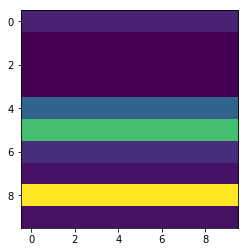

In [666]:
print np.min(cat_prob_payee)
print np.max(cat_prob_payee)
plt.imshow(cat_prob_payee[0:10, 0:10])
plt.show()

In [668]:
unified = list()
payee = np.unique(new_council['Creditor'])
payee_code = range(0, len(payee))
account_id = list(np.unique(transactions['account_id']))
for acc in range(0, len(np.unique(transactions['account_id']))):
    for trans in range(0, len(acc_trans_id[acc])):
        bal = acc_init_bal[acc]
        cat = delta_meta_cred[acc][trans]
        ksy = acc_k_symbol[acc][trans]
        dat = delta_time[acc][trans]
        amt = acc_deltas[acc][trans]
        inc = acc_mean_inc[acc]
        aid = account_id[acc]
        tid = acc_trans_id[acc][trans]
        
        # Random sample the payee according to area frequency
        pay = np.random.choice(payee_code, p=cat_prob_payee[cat,:]) 
        unified.append([aid, tid, cat, pay, ksy, dat, amt, inc, bal])

database = pd.DataFrame(unified, columns=['account_id', 'trans_id', 'category' ,'payee', 'k-symbol', 'date', 'amount', 'mean_income', 'Initial Balance'])

In [669]:
database.to_csv('database.csv')
database.head

<bound method DataFrame.head of          account_id  trans_id  category  payee k-symbol        date  \
0                 1         5         0   1288       -1  1995-03-24   
1                 1       199        29   1072       -1  1995-04-13   
2                 1   3530438        40    911        2  1995-04-23   
3                 1         6         0    381       -1  1995-04-30   
4                 1       200        46    180       -1  1995-05-13   
5                 1   3530439        40    899        2  1995-05-23   
6                 1         7         0    988       -1  1995-05-31   
7                 1       201        32   1023       -1  1995-06-13   
8                 1   3530440        40    913        2  1995-06-22   
9                 1         8         0     43       -1  1995-06-30   
10                1       202        32     86       -1  1995-07-13   
11                1   3530441        40    916        2  1995-07-22   
12                1         9         0    75

In [671]:
# Generate markdown table for payees
for ii in xrange(0, len(payee_code)):
    print '|' + str(creditors[ii]).replace('Account Description_','') + '|' + str(ii) + '|'

| ARGOS|0|
| COFFEE REPUBLIC WOO|1|
| COSTCUTTER|2|
| H HARIA CHEMIST|3|
| LEWISS|4|
| SAINSBURYS S/MKTS|5|
| SAVERS|6|
| STUDEN PHOTOCARD|7|
| Sainsburys S/mkts|8|
| TESCO PFS 2473|9|
| TESCO STORE 2126|10|
| TESCO STORE 2296|11|
| THE CURTAIN FACTORY|12|
| TSGN|13|
| WAITROSE 215|14|
|123-REG.CO.UK|15|
|2 MERCHANDISE|16|
|43033820 COSTA COFFEE|17|
|99 PLUS DISCOUNT MART|18|
|99P STORES LTD|19|
|A  Y LOCKSMITHS|20|
|A&Y LOCKSMITHS|21|
|AA DRIVING SCHOOL|22|
|AA MEDIA|23|
|ABBEY FIRE ALARMS|24|
|ABBEY LOCKSMITHS|25|
|ABEL ALARM COMPANY LIM|26|
|ABERYSTWYTH UNIVERSITY|27|
|ABLE GROUP UK|28|
|AC LEIGH (NORWICH) LTD|29|
|ACCESS EXPEDITIONS|30|
|ACE GRAPHICS|31|
|ACTIVITYBOOKER.NET|32|
|ADIDAS UK LTD|33|
|ADOBE  CREATIVE CLO|34|
|ADOBE  CREATIVE CLOUD|35|
|ADOBE SYSTEMS SOFTW|36|
|ADOBE SYSTEMS SOFTWARE|37|
|ADVANTIS CREDIT - MOTO|38|
|AFE SERVICELINE|39|
|AFE SERVICELINE0000|40|
|AFFINITY WATER LTD|41|
|AKZONOBEL|42|
|ALDI|43|
|ALEXANDRA|44|
|ALEXANDRA WEBSITE|45|
|ALIBRIS BOOKS|46|
|ALL 